IMPORTANDO LIBRERIAS

In [254]:
import pandas as pd
pd.set_option("display.precision", 12)

import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


Leyendo el archivo csv de peliculas

In [255]:
Datos = pd.read_csv("movies_1.csv")
Datos.columns = ["pelicula","clasificación","género","año","fecha lanzamiento","score","votos","director","escritor","protagonista",
                "país","presupuesto","recaudación","compañia","duración"]
Datos.head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40E+00,927.00E+03,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.00E+06,47.00E+06,Warner Bros.,146.00E+00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80E+00,65.00E+03,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.50E+06,58.85E+06,Columbia Pictures,104.00E+00
2,Star Wars: Episode V - The Empire St...,PG,Action,1980,"June 20, 1980 (United States)",8.70E+00,1.20E+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.00E+06,538.38E+06,Lucasfilm,124.00E+00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70E+00,221.00E+03,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.50E+06,83.45E+06,Paramount Pictures,88.00E+00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30E+00,108.00E+03,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.00E+06,39.85E+06,Orion Pictures,98.00E+00


In [191]:
Datos = Datos.iloc[0:6843] #SOLO HASTA LAS PELICULAS DEL 2015
Datos.to_csv("movies_2.csv",index = False) #Guardando este DF en un archivo csv

In [192]:
Datos = pd.read_csv("movies_2.csv") #Leyendo este nuevo archivo csv como data frame
Datos.tail()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
6838,Paul Blart: Mall Cop 2,PG,Action,2015,"April 17, 2015 (United States)",4.40E+00,35.00E+03,Andy Fickman,Kevin James,Kevin James,United States,30.00E+06,107.59E+06,Columbia Pictures,94.00E+00
6839,Remember,R,Drama,2015,"December 17, 2015 (United States)",7.50E+00,24.00E+03,Atom Egoyan,Benjamin August,Christopher Plummer,Canada,NaN,4.24E+06,Serendipity Point Films,94.00E+00
6840,War Room,PG,Drama,2015,"August 28, 2015 (United States)",6.50E+00,14.00E+03,Alex Kendrick,Alex Kendrick,Priscilla C. Shirer,United States,3.00E+06,73.26E+06,FaithStep Films,120.00E+00
6841,Dragon Blade,R,Action,2015,"September 4, 2015 (United States)",6.00E+00,19.00E+03,Daniel Lee,Daniel Lee,Jackie Chan,China,65.00E+06,122.61E+06,Sparkle Roll Media,127.00E+00
6842,45 Years,R,Drama,2015,"August 28, 2015 (United Kingdom)",7.10E+00,32.00E+03,Andrew Haigh,Andrew Haigh,Charlotte Rampling,United Kingdom,NaN,14.43E+06,BFI Film Fund,91.00E+00


In [193]:
#Veamos si hay datos faltantes
for columna in Datos.columns:
    promedio = np.mean(Datos[columna].isnull().sum())
    print(f'{columna} - {promedio:.0f}')

pelicula - 0
clasificación - 48
género - 0
año - 0
fecha lanzamiento - 2
score - 0
votos - 0
director - 0
escritor - 2
protagonista - 1
país - 2
presupuesto - 1912
recaudación - 175
compañia - 12
duración - 3


Observamos que el data frame Datos contiene valores nulos en diferentes columnas, vamos a eliminar estos valores y ver que porcentaje de datos queda

In [194]:
Datos.dropna().to_csv("movies_not_null.csv",index=False)
Datos_2= pd.read_csv("movies_not_null.csv")

In [195]:
len(Datos_2)/len(Datos) 
#Vemos que nos queda aproximadamente el 71% de los datos, lo cual es considereblemente bueno

0.7110916264796142

In [196]:
Datos_2.head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40E+00,927.00E+03,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19.00E+06,47.00E+06,Warner Bros.,146.00E+00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80E+00,65.00E+03,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4.50E+06,58.85E+06,Columbia Pictures,104.00E+00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70E+00,1.20E+06,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18.00E+06,538.38E+06,Lucasfilm,124.00E+00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70E+00,221.00E+03,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3.50E+06,83.45E+06,Paramount Pictures,88.00E+00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30E+00,108.00E+03,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6.00E+06,39.85E+06,Orion Pictures,98.00E+00


In [197]:
Datos_2.dtypes

pelicula              object
clasificación         object
género                object
año                    int64
fecha lanzamiento     object
score                float64
votos                float64
director              object
escritor              object
protagonista          object
país                  object
presupuesto          float64
recaudación          float64
compañia              object
duración             float64
dtype: object

In [198]:
Datos_2["duración"] = Datos_2["duración"].astype("int64")
#Haciendo el tipo de dato de la columna duración como entero

Se piensa que el presupuesto de la pelicula y la compañia tienen relación en el dinero recaudado de la misma

In [199]:
#Veamos las 5 peliculas que más dinero tuvieron de presupuesto
Datos_2.sort_values(by=["presupuesto"],inplace= False,ascending = False).head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
3417,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.10E+00,608.00E+03,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300.00E+06,961.00E+06,Walt Disney Pictures,169
3264,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.00E+00,274.00E+03,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270.00E+06,391.08E+06,Warner Bros.,154
3914,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.70E+00,417.00E+03,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260.00E+06,592.46E+06,Walt Disney Animation Studios,100
3415,Spider-Man 3,PG-13,Action,2007,"May 4, 2007 (United States)",6.20E+00,513.00E+03,Sam Raimi,Sam Raimi,Tobey Maguire,United States,258.00E+06,894.98E+06,Columbia Pictures,139
4711,Avengers: Age of Ultron,PG-13,Action,2015,"May 1, 2015 (United States)",7.30E+00,777.00E+03,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,250.00E+06,1.40E+09,Marvel Studios,141


In [200]:
#Veamos las 5 peliculas que más dinero recaudaron
Datos_2.sort_values(by=["recaudación"],inplace= False,ascending = False).head()

,pelicula,clasificación,género,año,fecha lanzamiento,score,votos,director,escritor,protagonista,país,presupuesto,recaudación,compañia,duración
3731,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80E+00,1.10E+06,James Cameron,James Cameron,Sam Worthington,United States,237.00E+06,2.85E+09,Twentieth Century Fox,162
1795,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80E+00,1.10E+06,James Cameron,James Cameron,Leonardo DiCaprio,United States,200.00E+06,2.20E+09,Twentieth Century Fox,194
4730,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80E+00,876.00E+03,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245.00E+06,2.07E+09,Lucasfilm,138
4720,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.00E+00,593.00E+03,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150.00E+06,1.67E+09,Universal Pictures,124
4224,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.00E+00,1.30E+06,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220.00E+06,1.52E+09,Marvel Studios,143


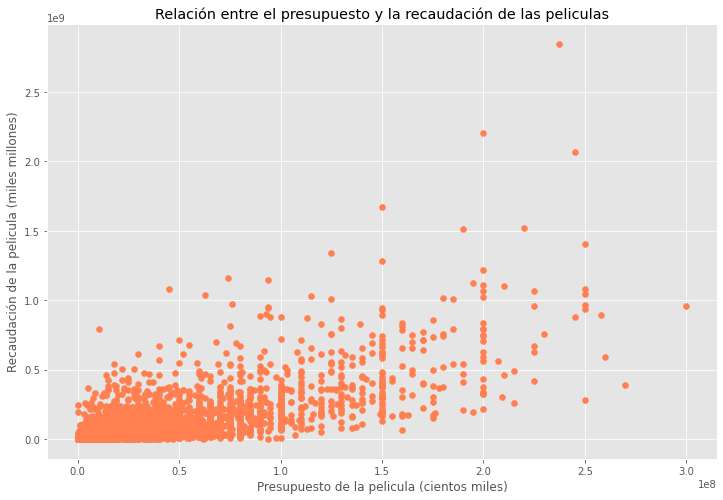

In [201]:
#Graficando 
plt.scatter(x=Datos_2["presupuesto"],y=Datos_2["recaudación"],color="coral")
plt.title("Relación entre el presupuesto y la recaudación de las peliculas")
plt.xlabel("Presupuesto de la pelicula (cientos miles)")
plt.ylabel("Recaudación de la pelicula (miles millones)")
plt.show()

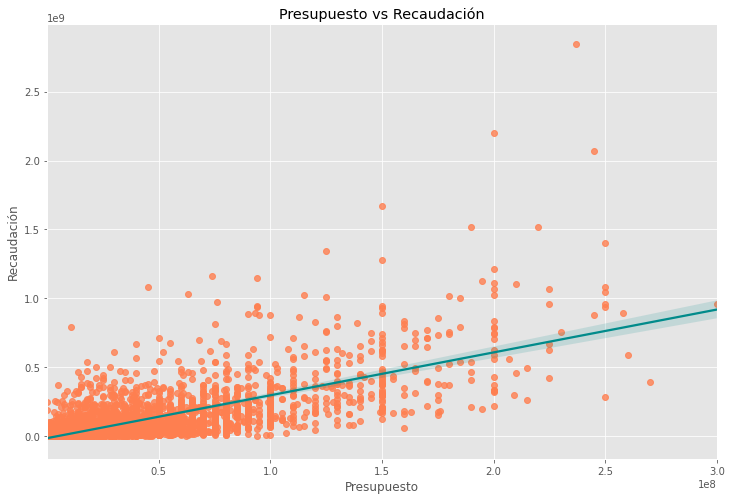

In [258]:
#Ahora tracemos la linea de regresión que se ajusta mejor a los datos

y = sns.regplot(x="presupuesto",y="recaudación",data = Datos_2,color="coral", line_kws = {"color": "darkcyan"})
y.set_title("Presupuesto vs Recaudación")
y.set_xlabel("Presupuesto")
y.set_ylabel("Recaudación")
plt.show()

Con las gráficas anterior nos podemos dar una idea que las variables de presupuesto y recaudación tienen una relación lineal positiva significativa, ahora veamos que tan cierta es esta hipotesis


In [256]:
#Viendo la correlación
Datos.corr()

,año,score,votos,presupuesto,recaudación,duración
año,1.00E+00,97.99E-03,222.94E-03,329.32E-03,257.49E-03,120.81E-03
score,97.99E-03,1.00E+00,409.18E-03,76.25E-03,186.26E-03,399.45E-03
votos,222.94E-03,409.18E-03,1.00E+00,442.43E-03,630.76E-03,309.21E-03
presupuesto,329.32E-03,76.25E-03,442.43E-03,1.00E+00,740.39E-03,320.45E-03
recaudación,257.49E-03,186.26E-03,630.76E-03,740.39E-03,1.00E+00,245.22E-03
duración,120.81E-03,399.45E-03,309.21E-03,320.45E-03,245.22E-03,1.00E+00


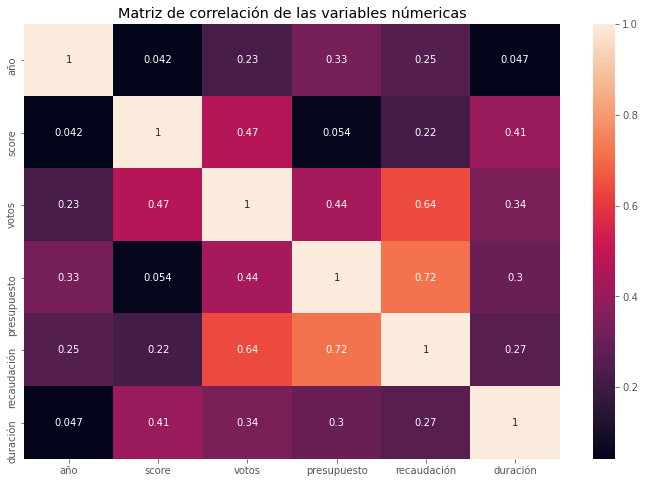

In [259]:
#Gráficando la matriz de correlación
matriz_corr = Datos_2.corr()
sns.heatmap(matriz_corr,annot=True)
plt.title("Matriz de correlación de las variables númericas")
plt.show()

Notamos que las variables de presupuesto y recaudación tienen una correlación del .72 con respecto al coeficiente de correlación de pearson, con esto se puede observar que existen una relación lineal siginificativa entre ambas variables